In [2]:
import pandas as pd

luca = pd.read_csv('/Users/beyzaaygun/Desktop/Bioinformatic/GITHUB/EV/EV/python/luca_expression.csv', index_col=0) 

print(luca)

                 GACGCGTAGCTAAGAT-1-18-8  861140_17-3  \
ENSG00000121410                      0.0          0.0   
ENSG00000268895                      0.0          0.0   
ENSG00000175899                      0.0          0.0   
ENSG00000245105                      0.0          0.0   
ENSG00000166535                      0.0          0.0   
...                                  ...          ...   
ENSG00000070476                      0.0          0.0   
ENSG00000203995                      0.0          0.0   
ENSG00000162378                      0.0          0.0   
ENSG00000159840                      0.0          0.0   
ENSG00000074755                      0.0          0.0   

                 ACGTCAACATCCCATC_LUNG_T08-5  402999_11-3  \
ENSG00000121410                          0.0          0.0   
ENSG00000268895                          0.0          0.0   
ENSG00000175899                          0.0          0.0   
ENSG00000245105                          0.0          0.0   
ENSG000001

In [3]:
transposed_luca = luca.transpose()

print(transposed_luca)

                             ENSG00000121410  ENSG00000268895  \
GACGCGTAGCTAAGAT-1-18-8             0.000000              0.0   
861140_17-3                         0.000000              0.0   
ACGTCAACATCCCATC_LUNG_T08-5         0.000000              0.0   
402999_11-3                         0.000000              0.0   
ATGGTTGTCAATCCGA-1_2-1              0.678011              0.0   
...                                      ...              ...   
598393_7-3                          0.000000              0.0   
ACCTTTACATTGAGCT-1_9-8              0.000000              0.0   
17_AAGGCGTCAGCT-20                  0.000000              0.0   
AGCTTGATCCACTGGG-1_3-6              0.000000              0.0   
410713_5-18                         0.000000              0.0   

                             ENSG00000175899  ENSG00000245105  \
GACGCGTAGCTAAGAT-1-18-8                  0.0              0.0   
861140_17-3                              0.0              0.0   
ACGTCAACATCCCATC_LUNG_T0

In [10]:
import requests

def get_ensemble_gene_id(gene_name):
    url = f"https://rest.ensembl.org/lookup/symbol/homo_sapiens/{gene_name}?content-type=application/json"
    response = requests.get(url)
    if response.ok:
        data = response.json()
        ensemble_gene_id = data['id']
        return ensemble_gene_id
    else:
        print(f"Error: Unable to retrieve Ensemble Gene ID for {gene_name}")
        return None

# Örnek gen isimleri
wanted_genes = ["ARF6", "CD37", "CD63", "CD81", "CD9", "CHMP1A", "CHMP1B", "CHMP2A", "CHMP2B", "CHMP3", "CHMP4A", "CHMP4B", "CHMP5", "CHMP6", "HGS", "HSP90AA1", "HSPA4", "HSPA8", "HSPD1", "MVB12A", "MVB12B", "PDCD6", "PDCD6IP", "SDCBP", "SNF8", "STAM", "STAM2", "TSG101", "VPS25", "VPS36", "VPS37A", "VPS37B", "VPS37C", "VPS37D", "VPS4A", "VTA1"]

# Ensemble Gene ID'lerini depolamak için bir liste oluştur
ensemble_gene_ids = []

for gene_name in wanted_genes:
    ensemble_gene_id = get_ensemble_gene_id(gene_name)
    if ensemble_gene_id:
        ensemble_gene_ids.append(ensemble_gene_id)

# Ensemble Gene ID'lerini virgülle ayrılmış ve çift tırnak içinde yazdır
ensemble_gene_ids_str = ', '.join(['"' + gene_id + '"' for gene_id in ensemble_gene_ids])
print(ensemble_gene_ids_str)


"ENSG00000165527", "ENSG00000104894", "ENSG00000135404", "ENSG00000110651", "ENSG00000010278", "ENSG00000131165", "ENSG00000255112", "ENSG00000130724", "ENSG00000083937", "ENSG00000115561", "ENSG00000254505", "ENSG00000101421", "ENSG00000086065", "ENSG00000176108", "ENSG00000185359", "ENSG00000080824", "ENSG00000170606", "ENSG00000109971", "ENSG00000144381", "ENSG00000141971", "ENSG00000196814", "ENSG00000249915", "ENSG00000170248", "ENSG00000137575", "ENSG00000159210", "ENSG00000136738", "ENSG00000115145", "ENSG00000074319", "ENSG00000131475", "ENSG00000136100", "ENSG00000155975", "ENSG00000139722", "ENSG00000167987", "ENSG00000176428", "ENSG00000132612", "ENSG00000009844"


In [11]:
wanted_genes = ["ENSG00000165527", "ENSG00000104894", "ENSG00000135404", "ENSG00000110651", "ENSG00000010278", "ENSG00000131165", "ENSG00000255112", "ENSG00000130724", "ENSG00000083937", "ENSG00000115561", "ENSG00000254505", "ENSG00000101421", "ENSG00000086065", "ENSG00000176108", "ENSG00000185359", "ENSG00000080824", "ENSG00000170606", "ENSG00000109971", "ENSG00000144381", "ENSG00000141971", "ENSG00000196814", "ENSG00000249915", "ENSG00000170248", "ENSG00000137575", "ENSG00000159210", "ENSG00000136738", "ENSG00000115145", "ENSG00000074319", "ENSG00000131475", "ENSG00000136100", "ENSG00000155975", "ENSG00000139722", "ENSG00000167987", "ENSG00000176428", "ENSG00000132612", "ENSG00000009844"]


# İstenilen genlerin olduğu sütunları filtrele
filtered_luca = transposed_luca[wanted_genes]

# Sonucu göster
print(filtered_luca)

                             ENSG00000165527  ENSG00000104894  \
GACGCGTAGCTAAGAT-1-18-8             0.650133         0.650133   
861140_17-3                         0.000000         0.609664   
ACGTCAACATCCCATC_LUNG_T08-5         0.635904         1.516206   
402999_11-3                         2.019224         0.000000   
ATGGTTGTCAATCCGA-1_2-1              0.000000         0.395400   
...                                      ...              ...   
598393_7-3                          0.000000         0.000000   
ACCTTTACATTGAGCT-1_9-8              0.000000         0.000000   
17_AAGGCGTCAGCT-20                  0.000000         0.000000   
AGCTTGATCCACTGGG-1_3-6              0.000000         0.000000   
410713_5-18                         0.000000         0.599348   

                             ENSG00000135404  ENSG00000110651  \
GACGCGTAGCTAAGAT-1-18-8             0.000000         0.000000   
861140_17-3                         0.000000         0.000000   
ACGTCAACATCCCATC_LUNG_T0

In [12]:

from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

#  store the row names
row_names = filtered_luca.index.tolist()

# Use the DataFrame containing only gene expressions
gen_expression_only = filtered_luca.values

# Create the PCA model
pca = PCA(n_components=36)  # Let's take a total of 36 components

# Apply the PCA model to the dataset and make it compatible
pca.fit(gen_expression_only)

# Create a DataFrame containing the PCA results
pca_result = pd.DataFrame(pca.transform(gen_expression_only), columns=[f'PC{i+1}' for i in range(36)])

# Add back the row names
pca_result.index = row_names

print(pca_result)


                                  PC1       PC2       PC3       PC4       PC5  \
GACGCGTAGCTAAGAT-1-18-8      1.348155 -0.797370  0.369283 -0.021395  0.295265   
861140_17-3                  2.805759 -0.731389  0.602043 -0.685652 -0.280105   
ACGTCAACATCCCATC_LUNG_T08-5 -0.626368 -1.289541  0.411573  1.010315  0.151231   
402999_11-3                  0.683181 -0.742590  0.210906 -0.369098  0.192561   
ATGGTTGTCAATCCGA-1_2-1      -0.419392  0.950139  0.105929  0.668886  0.770626   
...                               ...       ...       ...       ...       ...   
598393_7-3                  -0.372380 -0.212668  0.419285 -0.591377 -0.207060   
ACCTTTACATTGAGCT-1_9-8       0.816991 -0.566372 -0.677998 -0.302731  0.029812   
17_AAGGCGTCAGCT-20           1.015897  0.375056 -0.799345 -0.565848 -0.079860   
AGCTTGATCCACTGGG-1_3-6      -0.903151 -0.248318  0.692035 -1.658445 -0.092043   
410713_5-18                 -1.773012  0.305714  0.142284  0.197244 -0.575318   

                           

In [13]:
print(pca.singular_values_)

[111.64572828  93.74616268  68.70609435  61.56087258  55.22441805
  52.5818544   49.88671781  46.38941007  45.94615083  42.1006021
  39.66030937  37.50459403  35.06298489  33.86245004  32.29257462
  30.98609344  29.23220701  28.21328736  27.87558202  27.59779958
  27.06485568  26.81277345  25.52658153  22.24697806  20.65630726
  20.26782573  19.21974809  18.72118605  18.16995813  17.71669857
  16.84640245  16.38006746  15.66905655  10.24264663   9.97816561
   2.07996007]


In [14]:
print(pca.explained_variance_ratio_)

[2.06180302e-01 1.45368379e-01 7.80824572e-02 6.26862778e-02
 5.04458269e-02 4.57335322e-02 4.11654447e-02 3.55959549e-02
 3.49189533e-02 2.93183526e-02 2.60180740e-02 2.32665444e-02
 2.03357745e-02 1.89670463e-02 1.72491736e-02 1.58816859e-02
 1.41346858e-02 1.31664997e-02 1.28531873e-02 1.25982976e-02
 1.21164217e-02 1.18917680e-02 1.07782503e-02 8.18662698e-03
 7.05778329e-03 6.79480929e-03 6.11024088e-03 5.79735196e-03
 5.46098272e-03 5.19192657e-03 4.69436973e-03 4.43807177e-03
 4.06114639e-03 1.73535099e-03 1.64688913e-03 7.15604306e-05]


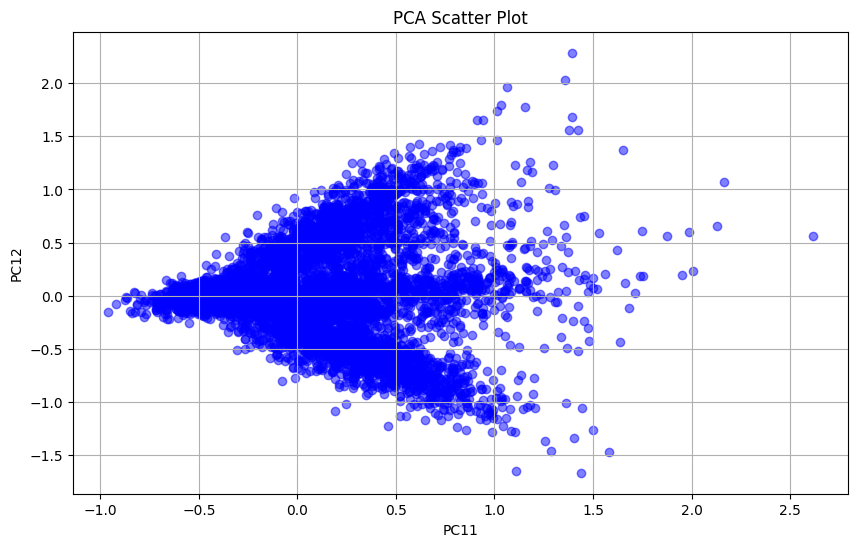

In [15]:
import matplotlib.pyplot as plt

# PCA bileşenlerini seçme
component1 = 'PC11'
component2 = 'PC12'

# PCA sonuçlarından PC1 ve PC2'yi alın
x = pca_result[component1]
y = pca_result[component2]

# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel(component1)
plt.ylabel(component2)
plt.grid(True)
plt.show()


In [16]:
#eliminate PC1 and PC2 for prepearing randomforest
pca_result_modified = pca_result.drop(columns=['PC1', 'PC2'])

pca_result_modified = pca_result_modified.iloc[:, :10]

print(pca_result_modified)

                                  PC3       PC4       PC5       PC6       PC7  \
GACGCGTAGCTAAGAT-1-18-8      0.369283 -0.021395  0.295265  0.210933  0.223405   
861140_17-3                  0.602043 -0.685652 -0.280105  0.609240  0.899178   
ACGTCAACATCCCATC_LUNG_T08-5  0.411573  1.010315  0.151231  0.205026 -0.040660   
402999_11-3                  0.210906 -0.369098  0.192561 -0.596443 -0.575618   
ATGGTTGTCAATCCGA-1_2-1       0.105929  0.668886  0.770626 -0.165646 -0.088702   
...                               ...       ...       ...       ...       ...   
598393_7-3                   0.419285 -0.591377 -0.207060 -0.514298 -0.099088   
ACCTTTACATTGAGCT-1_9-8      -0.677998 -0.302731  0.029812 -0.481948 -0.512842   
17_AAGGCGTCAGCT-20          -0.799345 -0.565848 -0.079860  0.485103 -0.535158   
AGCTTGATCCACTGGG-1_3-6       0.692035 -1.658445 -0.092043  1.749339 -1.485356   
410713_5-18                  0.142284  0.197244 -0.575318 -0.491175  0.551670   

                           

In [18]:
import pandas as pd
import joblib

# Eğitilmiş modeli yükleme
loaded_model = joblib.load('/Users/beyzaaygun/Desktop/Bioinformatic/GITHUB/EV/EV/python/random_forest_model.pkl')

# Yeni veri setinden özellikleri seçme
X_new = pca_result_modified.iloc[:, :]

# Test seti üzerinde %votes değerlerini tahmin etme
votes = loaded_model.predict_proba(X_new)

# Her bir hücre ismi için %votes değerlerini içeren bir DataFrame oluşturma
votes_df = pd.DataFrame(data=votes, columns=loaded_model.classes_, index=X_new.index)

# DataFrame'i görüntüleme veya işlem yapma
print(votes_df)
votes_df.to_csv('votes_df_luca.csv', index=True)


/Users/beyzaaygun/Desktop/Bioinformatic/GITHUB/EV/.venv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/beyzaaygun/Desktop/Bioinformatic/GITHUB/EV/.venv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


                             negative  positive
GACGCGTAGCTAAGAT-1-18-8          0.23      0.77
861140_17-3                      0.80      0.20
ACGTCAACATCCCATC_LUNG_T08-5      0.75      0.25
402999_11-3                      0.91      0.09
ATGGTTGTCAATCCGA-1_2-1           0.56      0.44
...                               ...       ...
598393_7-3                       0.29      0.71
ACCTTTACATTGAGCT-1_9-8           0.79      0.21
17_AAGGCGTCAGCT-20               0.45      0.55
AGCTTGATCCACTGGG-1_3-6           0.63      0.37
410713_5-18                      0.54      0.46

[10000 rows x 2 columns]


In [20]:
cell_types = pd.read_csv('/Users/beyzaaygun/Desktop/Bioinformatic/GITHUB/EV/EV/python/primary_luca_cell_type.csv', index_col=0) 

print(cell_types)

                                      ann_fine
GACGCGTAGCTAAGAT-1-18-8      T cell regulatory
861140_17-3                  T cell regulatory
ACGTCAACATCCCATC_LUNG_T08-5             B cell
402999_11-3                         T cell CD4
ATGGTTGTCAATCCGA-1_2-1              Macrophage
...                                        ...
598393_7-3                             NK cell
ACCTTTACATTGAGCT-1_9-8       T cell regulatory
17_AAGGCGTCAGCT-20                Cancer cells
AGCTTGATCCACTGGG-1_3-6            Cancer cells
410713_5-18                        Neutrophils

[10000 rows x 1 columns]


In [21]:
# Yeni bir DataFrame oluşturma ve sıfırlarla doldurma
new_column = pd.DataFrame(index=votes_df.index, columns=["cell_types"])

# Cell_types DataFrame'inin indekslerini kontrol ederek eşleşen satırlara karşılık gelen değerleri atama
for index in cell_types.index:
    if index in votes_df.index:
        new_column.loc[index] = cell_types.loc[index].values[0]

# Yeni sütunu votes_df'e eklemek
votes_df["cell_types"] = new_column

# Oluşturulan DataFrame'i gösterme
print(votes_df)


                             negative  positive         cell_types
GACGCGTAGCTAAGAT-1-18-8          0.23      0.77  T cell regulatory
861140_17-3                      0.80      0.20  T cell regulatory
ACGTCAACATCCCATC_LUNG_T08-5      0.75      0.25             B cell
402999_11-3                      0.91      0.09         T cell CD4
ATGGTTGTCAATCCGA-1_2-1           0.56      0.44         Macrophage
...                               ...       ...                ...
598393_7-3                       0.29      0.71            NK cell
ACCTTTACATTGAGCT-1_9-8           0.79      0.21  T cell regulatory
17_AAGGCGTCAGCT-20               0.45      0.55       Cancer cells
AGCTTGATCCACTGGG-1_3-6           0.63      0.37       Cancer cells
410713_5-18                      0.54      0.46        Neutrophils

[10000 rows x 3 columns]


In [24]:
max_positive_value = votes_df["positive"][votes_df["positive"] > 0].max()
print("En büyük pozitif değer:", max_positive_value)


En büyük pozitif değer: 1.0
